In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

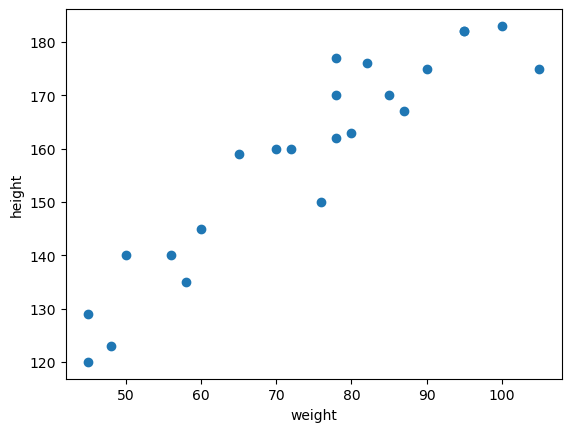

In [8]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [9]:
x=df[["Weight"]]
y=df["Height"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train) 
x_test_scaled=scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_scaled,y_train)

LinearRegression()

Text(0, 0.5, 'height')

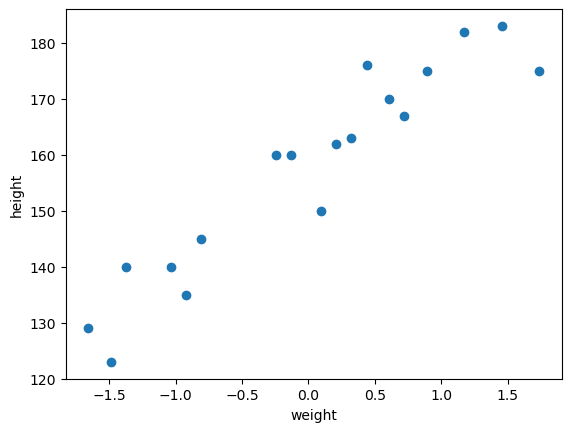

In [12]:
plt.scatter(x_train_scaled,y_train)
plt.xlabel("weight")
plt.ylabel("height")

In [13]:
print(f"coefficent/slope= {regression.coef_} and intercept= {regression.intercept_}")

coefficent/slope= [17.03440872] and intercept= 157.5


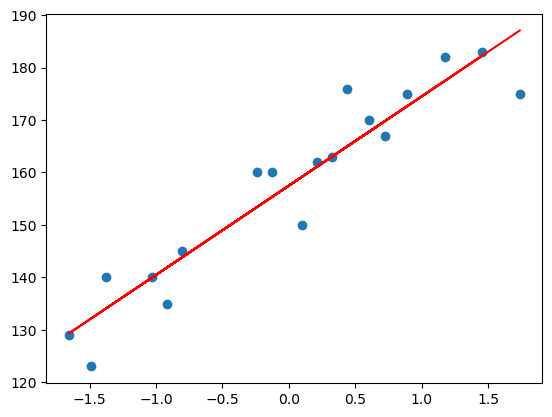

In [18]:
plt.scatter(x_train_scaled,y_train)
plt.plot(x_train_scaled,regression.predict(x_train_scaled),color="red")

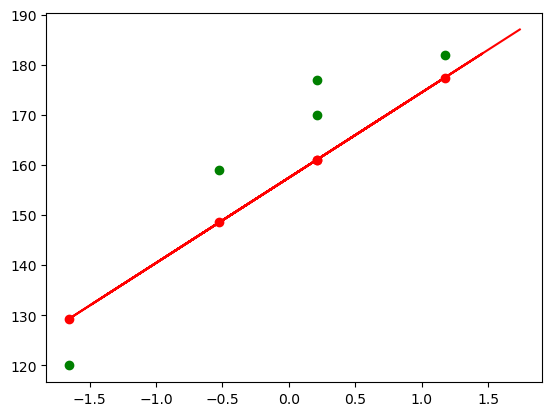

In [22]:
plt.plot(x_train_scaled,regression.predict(x_train_scaled),color="red")
plt.scatter(x_test_scaled,regression.predict(x_test_scaled),color="red")
plt.scatter(x_test_scaled,y_test,color="green")

In [23]:
y_pred=regression.predict(x_test_scaled)

In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(f"r2_score= {score}")
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"mse= {mse}")
print(f"mae= {mae}")
print(f"rmse= {rmse}")

r2_score= 0.7769869860423441
mse= 109.77592599051654
mae= 9.822657814519227
rmse= 10.477400726827076


In [33]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [36]:
regression.predict([scaled_weight[0]])

array([163.01076266])

# when do we say our model is great

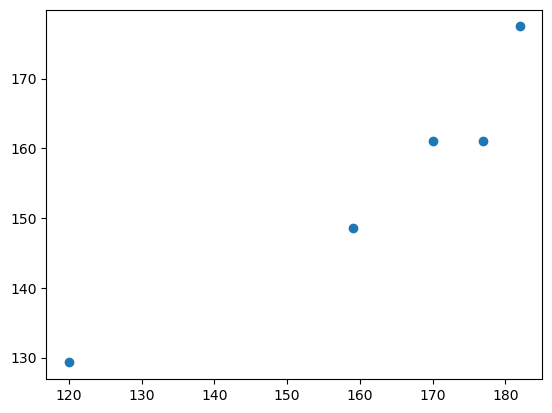

In [37]:
plt.scatter(y_test,y_pred)

In [38]:
residual=y_test-y_pred
residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_17620\3623253895.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

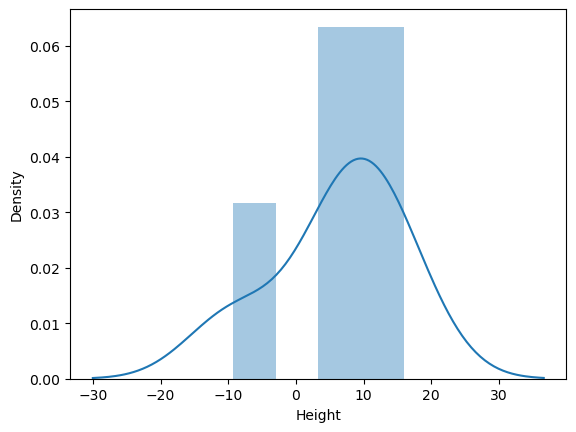

In [41]:
import seaborn as sns

sns.distplot(residual,kde=True)

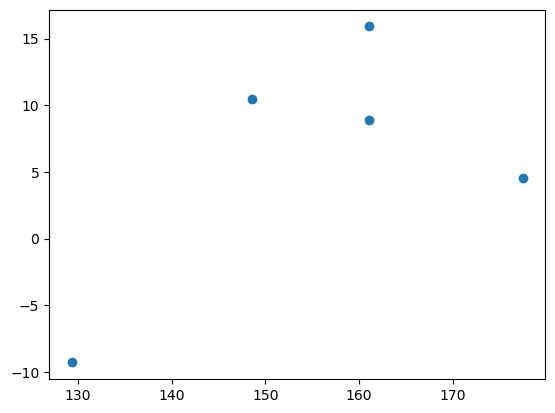

In [42]:
plt.scatter(y_pred,residual)